

**PHASE** **1** **PROJECT**.
1. **Overview**.

Microsoft is trying to venture into the movie industry due to the fact that other companies are creating original content. However, due to no prior experience whatsoever on how to do this,they ought to consult on how box office movies perfom and what genre to go into.

2. **Business** **Understanding**

 The box office is ideally a place or theatre where tickets are sold. However, it is also used to refer to the commercial success of a film, play or even actors in terms of the audience and how the movie performed. We will be looking at what makes a movie do well at the box office by taking a look at the data made available to us.We shall be answering the following questions;

 a.What genre should microsoft venture into based on profits generated?

 b.How does the movie runtime compare to its rating?

 c. Which actors and directors should they hire due to their ratings?

 d. How profitable movies have been throughout the years.

3. **Data** **Understanding**

 The data set the we will be using for this analysis will be from various movie sites such as: Box Office Mojo,IMDB, Rotten tomatoes,ThemovieDB and The Numbers. The data consists of the following files; bom.movie_gross.csv,movie_ratings,tmdb.movies.csvtn, movie_budgets.csv and im.db


In [1037]:

# Loading the Data from the source i.e. csv

# Dataset url = http://bit.ly/MallCustomersDataset
#Install Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import gzip
import sqlite3

%matplotlib inline


In [1038]:
movie_gross=pd.read_csv('bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1039]:
bom_movies = pd.read_csv('bom.movie_gross.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')


In [1040]:
# Importing Sqlite3 Module
import sqlite3
# Making a connection between sqlite3
# database and Python Program
conn = sqlite3.connect('im.db')
 # Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
 # Creating cursor object using connection object
cursor = conn.cursor()
# executing our sql query
cursor.execute(sql_query)
print("List of tables\n")
# printing all tables list
print(cursor.fetchall())

List of tables

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [1041]:
#determining the number of records in our dataset.
# Determining the no. of records in each of our csv datasets
# Using the shape attribute
num_records = bom_movies.shape[0]
print("Number of records in bom_movies dataset:", num_records)

Number of records in bom_movies dataset: 3387


In [1042]:
num_records_tmdb = tmdb_movies.shape[0]
print("Number of records in tmdb_movies dataset:", num_records_tmdb)


Number of records in tmdb_movies dataset: 26517


In [1043]:
# Number of records in tn_movie_budgets dataset
num_records_budgets = tn_movie_budgets.shape[0]
print("Number of records in tn_movie_budgets dataset:", num_records_budgets)

Number of records in tn_movie_budgets dataset: 5782


In [1044]:
# For 'im.db' data, the relevant data to this analysis is from movie_basics and m0vie_ratings tables. Therefore, we check the two table
q = '''SELECT *
    FROM movie_basics;
    '''
a=pd.read_sql(q, conn)

In [1045]:
#determining the number of records in our dataset.
# Determining the no. of records in each of our csv datasets
# Using the shape attribute
num_records_a =a.shape[0]
print("Number of records in a dataset:", num_records_a)

Number of records in a dataset: 146144


In [1046]:
# For 'im.db' data, the relevant data to this analysis is from movie_basics and m0vie_ratings tables. Therefore, we check the two table
q = '''SELECT *
    FROM movie_ratings;
    '''
b=pd.read_sql(q, conn)

In [1047]:
#determining the number of records in our dataset.

num_records_b =b.shape[0]
print("Number of records in a dataset:", num_records_b)

Number of records in a dataset: 73856


In [1048]:
# Preview the top of the bom_movies dataset
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1049]:
# Preview the top of the tmdb_movies dataset
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [1050]:
# Preview the top of the tn_movie_budgets dataset
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [1051]:
# Previewing the bottom of our dataset
# bottom of the bom_movies dataset
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [1052]:
#bottom of the tmdb_movies dataset
tmdb_movies.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [1053]:
# Preview the bottom of the tn_movie_budgets dataset
tn_movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [1054]:
# Checking whether each column has an appropriate datatype
#bom_movies dataset
bom_movies.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [1055]:
#tmdb_movies dataset
tmdb_movies.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [1056]:
#tn_movie_budgets dataset
tn_movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [1057]:
 
database_path = 'movie_basics.sql'

# Create a connection to the SQLite database
connection = sqlite3.connect(database_path)

# Use a PRAGMA statement to get the table information, including column names and types
table_info_query = 'PRAGMA table_info(movie_basics)'


# Execute the query and fetch the result
table_info = connection.execute(table_info_query).fetchall()

# Print column names and their corresponding data types
for column_info in table_info:
    column_name = column_info[1]
    column_type = column_info[2]
    print(f'Column: {column_name}, Data Type: {column_type}')

# Close the database connection
connection.close()

In [1058]:
 
database_path = 'movie_basics.sql'

# Create a connection to the SQLite database
connection = sqlite3.connect(database_path)

# Use a PRAGMA statement to get the table information
table_info_query = 'PRAGMA table_info(movie_ratings)'


# Execute the query and fetch the result
table_info = connection.execute(table_info_query).fetchall()

# Print column names and their corresponding data types
for column_info in table_info:
    column_name = column_info[1]
    column_type = column_info[2]
    print(f'Column: {column_name}, Data Type: {column_type}')

# Close the database connection
connection.close()

#Making sure your data matches something outside of the dataset is very important. 
#It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. 
#External validation can often be as simple as checking your data against a single number, as we will do here.

In [1059]:
#column representing box office gross
column_to_validate = 'domestic_gross'

# Known total gross for external validation
known_total_gross = 1000000  # Replace with the actual known total

# Sum of the values in the 'total_gross' column
sum_total_gross = bom_movies[column_to_validate].sum()

# Check if the sum matches the known total
if sum_total_gross == known_total_gross:
    print(f"The sum of {column_to_validate} matches the known total gross.")
else:
    print(f"The sum of {column_to_validate} does not match the known total gross.")


The sum of domestic_gross does not match the known total gross.


In [1060]:
#column representing box office gross
column_to_validate = 'domestic_gross'

# Known total gross for external validation
known_total_gross = 1000000  # Replace with the actual known total

# Sum of the values in the 'domestic_gross' column
sum_total_gross =tn_movie_budgets[column_to_validate].sum()

# Check if the sum matches the known total
if sum_total_gross == known_total_gross:
    print(f"The sum of {column_to_validate} matches the known total gross.")
else:
    print(f"The sum of {column_to_validate} does not match the known total gross.")


The sum of domestic_gross does not match the known total gross.


In [1061]:
# Assuming 'worldwide_gross' is the column representing box office gross
column_to_validate = 'worldwide_gross'

# Known total gross for external validation
known_total_gross = 1000000  # Replace with the actual known total

# Sum of the values in the 'worldwide_gross' column
sum_total_gross =tn_movie_budgets[column_to_validate].sum()

# Check if the sum matches the known total
if sum_total_gross == known_total_gross:
    print(f"The sum of {column_to_validate} matches the known total gross.")
else:
    print(f"The sum of {column_to_validate} does not match the known total gross.")


The sum of worldwide_gross does not match the known total gross.


It is clear that the sums do not match, it signals that further investigation may be needed.

 5. Studying the Dataset

Having studied the data and realized several of them have missing values,
so for this next step we check for missing values and other inconsistencies and
 possible duplicates we identify and handle them.For the relevant datasets,
dropping the rows with the missing values is the most suitable solution.



c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


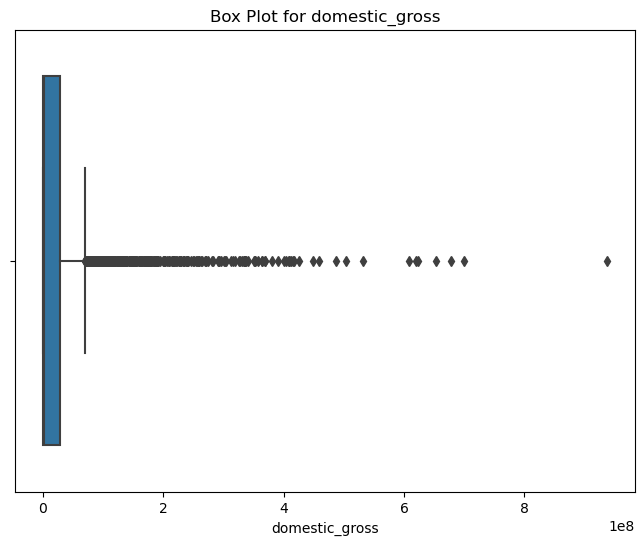

Summary Statistics:
count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64
Potential Outliers:
                                            title studio  domestic_gross  \
0                                     Toy Story 3     BV     415000000.0   
1                      Alice in Wonderland (2010)     BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                       Inception     WB     292600000.0   
4                             Shrek Forever After   P/DW     238700000.0   
...                                           ...    ...             ...   
3120                   Disney's Christopher Robin     BV      99200000.0   
3121                              The Equalizer 2   Sony     102100000.0   
3123                                     The Mule     WB     10

In [1062]:

#checking for outliers in bom_movies
#column with potential outliers
column_with_outliers = 'domestic_gross'

# box plot to visualize the distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=bom_movies[column_with_outliers])
plt.title(f'Box Plot for {column_with_outliers}')
plt.show()

#using statistics
summary_stats = bom_movies[column_with_outliers].describe()
print("Summary Statistics:")
print(summary_stats)

#interquartile range (IQR)
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

# threshold for outliers
outlier_threshold = 1.5 * IQR

# Identify potential outliers
outliers = bom_movies[(bom_movies[column_with_outliers] < Q1 - outlier_threshold) | 
                      (bom_movies[column_with_outliers] > Q3 + outlier_threshold)]

print("Potential Outliers:")
print(outliers)


In [1063]:
# cleaning the column with outliers
threshold = 3  
clipped_values = np.clip(bom_movies[column_with_outliers], a_min=None, a_max=threshold)

# Replace the original column with the clipped values
bom_movies[column_with_outliers] = clipped_values


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


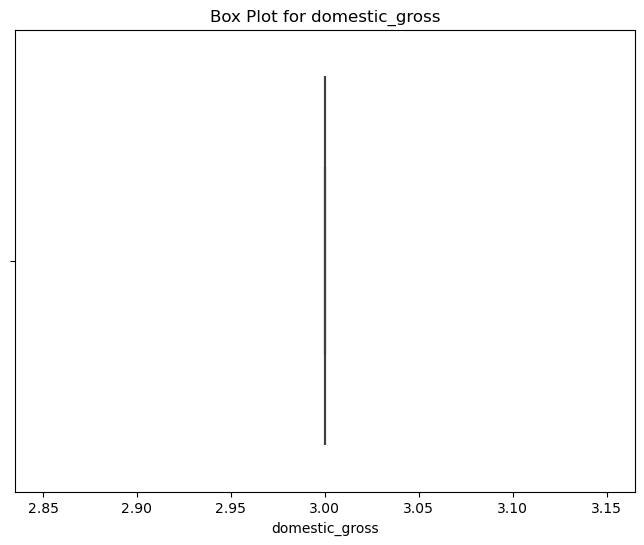

Summary Statistics:
count    3359.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: domestic_gross, dtype: float64
Potential Outliers:
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


In [1064]:

#checking for outliers in bom_movies
#column with potential outliers
column_with_outliers = 'domestic_gross'

# box plot to visualize the distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=bom_movies[column_with_outliers])
plt.title(f'Box Plot for {column_with_outliers}')
plt.show()

#using statistics
summary_stats = bom_movies[column_with_outliers].describe()
print("Summary Statistics:")
print(summary_stats)

#interquartile range (IQR)
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

# Define a threshold for outliers
outlier_threshold = 1.5 * IQR

# Identify potential outliers
outliers = bom_movies[(bom_movies[column_with_outliers] < Q1 - outlier_threshold) | 
                      (bom_movies[column_with_outliers] > Q3 + outlier_threshold)]

print("Potential Outliers:")
print(outliers)


In [1065]:

#the column with potential outliers
column_with_outliers = 'worldwide_gross'

# Check for missing values in 'worldwide_gross' column
missing_values = tn_movie_budgets[column_with_outliers].isnull().sum()
if missing_values > 0:
    # Handle missing values
    tn_movie_budgets[column_with_outliers].fillna(tn_movie_budgets[column_with_outliers].median(), inplace=True)




In [1066]:
#column with potential outliers
#  column with potential outliers
tn_movie_budgets[column_with_outliers] = pd.to_numeric(tn_movie_budgets[column_with_outliers], errors='coerce')



In [1067]:


#column with potential outliers
column_with_outliers = 'worldwide_gross'

# Extract the column data
data = tn_movie_budgets[column_with_outliers]

#first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

#interquartile range (IQR)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = tn_movie_budgets[(data < lower_bound) | (data > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross]
Index: []


In [1068]:

#column with potential outliers
column_with_outliers = 'vote_count'

# Check for missing values in 'domestic_gross' column
missing_values = tmdb_movies[column_with_outliers].isnull().sum()
if missing_values > 0:
    # Handle missing values (replace with mean, median, or dropna)
    tmdb_movies[column_with_outliers].fillna(tmdb_movies[column_with_outliers].median(), inplace=True)




In [1069]:



#column with potential outliers
column_with_outliers = 'vote_count'

# Extract the column data
data = tmdb_movies[column_with_outliers]

# first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

#interquartile range (IQR)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = tmdb_movies[(data < lower_bound) | (data > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
24609       24609                 [18]  422619                en   
24624       24624       [18, 9648, 80]  434775                ja   
24628       24628                 [35]  520594                en   
24636       24636             [18, 35]  421471                en   
24744       24744      [35, 18, 10749]  431017                fr   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1            

In [1070]:
#cleaning the outliers
threshold = 3 
clipped_values = np.clip(tmdb_movies[column_with_outliers], a_min=None, a_max=threshold)

# Replace the original column with the clipped values
tmdb_movies[column_with_outliers] = clipped_values


In [1071]:

#column with potential outliers
column_with_outliers = 'vote_count'

# Extract the column data
data = tmdb_movies[column_with_outliers]

#first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

#interquartile range (IQR)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = tmdb_movies[(data < lower_bound) | (data > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]
Index: []


it has no anomalies

We will start looking for the missing data in the tables and fix them.

In [1072]:
# Query to select movie_id and original_title from the 'movie_basics' table
movie_basics_query = """
SELECT movie_id, original_title
FROM movie_basics;
"""

# Query to select movie_id, averaging, and numvotes from the 'movie_rating' table
movie_rating_query = """
SELECT movie_id, averagerating, numvotes
FROM movie_ratings;
"""

# Execute the queries and read the results into DataFrames
movie_basics = pd.read_sql(movie_basics_query, conn)
movie_ratings = pd.read_sql(movie_rating_query, conn)

In [1073]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [1074]:
movie_basics.isna().sum()

movie_id           0
original_title    21
dtype: int64

In [1075]:
#checking for missing values in bom_movies
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [1076]:
#checking for missing values in tmdb_movies
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [1077]:
#checking for missing values in th_movie_budgets
tn_movie_budgets.isna().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross      5782
dtype: int64

The movie_basics,bon_movies and tn_movie budgets have missing values which we will work on in the nex step.

In [1078]:

# Dropping missing values in bom_movies
bom_movies = bom_movies.dropna()
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,3.0,652000000,2010
1,Alice in Wonderland (2010),BV,3.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,3.0,664300000,2010
3,Inception,WB,3.0,535700000,2010
4,Shrek Forever After,P/DW,3.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,3.0,1500000,2018
3286,The Catcher Was a Spy,IFC,3.0,229000,2018
3309,Time Freak,Grindstone,3.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,3.0,5200,2018


In [1079]:
# Rechecking for missing values 
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

We have dropped all the missing values in the bon_movies section. We will do the same to the other tables.

In [1080]:
movie_basics = movie_basics.dropna()
movie_basics


,movie_id,original_title
0,tt0063540,Sunghursh
1,tt0066787,Ashad Ka Ek Din
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,La Telenovela Errante
...,...,...
146139,tt9916538,Kuambil Lagi Hatiku
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro
146141,tt9916706,Dankyavar Danka
146142,tt9916730,6 Gunn


In [1081]:
movie_basics.isna().sum()

movie_id          0
original_title    0
dtype: int64

There are no missing values.

In [1082]:
tn_movie_budgets = tn_movie_budgets.dropna()
tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [1083]:
#checking for missing values in th_movie_budgets
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [1084]:
#checking for duplicates.
movie_basics.duplicated().sum()

0

Movie_duplicates contains no duplicates.

In [1085]:
movie_ratings.duplicated().sum()


0

movie_ratings contains no duplicates.

In [1086]:
bom_movies.duplicated().value_counts()

False    2007
Name: count, dtype: int64

In [1087]:
tmdb_movies.duplicated().value_counts()

False    26517
Name: count, dtype: int64

In [1088]:
tn_movie_budgets.duplicated().value_counts()

Series([], Name: count, dtype: int64)

From our findings,none of our datasets contain any duplicates


After cleaning our datasets and making sure everything is in order, we will merge our clean datasets. This will take us one step closer to finding our solutions.

In [1089]:
#join the two SQl tables
cleaned_data = '''SELECT movie_basics.runtime_minutes,movie_basics.genres,
                   movie_ratings.averagerating, movie_ratings.numvotes
                   FROM (movie_basics ,movie_ratings) AS cleaned_data
                   WHERE  movie_basics.movie_id =movie_ratings.movie_id;
                '''
pd.read_sql(cleaned_data, conn)

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
3,NaN,"Comedy,Drama",6.1,13
4,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136
73853,NaN,Documentary,8.5,8
73854,NaN,None,6.6,5


We have a couple of rows with missing values after the merge. We shall drop those values to get a clean data set.

In [1090]:
cleaned_data = pd.read_sql(cleaned_data, conn)
cleaned_data

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
3,NaN,"Comedy,Drama",6.1,13
4,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136
73853,NaN,Documentary,8.5,8
73854,NaN,None,6.6,5


In [1091]:
cleaned_data = cleaned_data.dropna()

In [1092]:
cleaned_data

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
73849,130.0,Drama,8.4,365
73850,86.0,Documentary,6.2,5
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136


The data has been cleaned. Wewill go ahead and merge the csv datasets.

In [1093]:
#merging of the 3 csv files
cd = pd.concat([bom_movies, tmdb, tn_movie_budgets])
cd

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22372\1217434377.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cd = pd.concat([bom_movies, tmdb, tn_movie_budgets])


,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,3.0,652000000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,3.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,3.0,664300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,3.0,535700000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,3.0,513900000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,Laboratory Conditions,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,Laboratory Conditions,0.6,2018-10-13,0.0,1.0,NaN,NaN,NaN
26513,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,_EXHIBIT_84xxx_,0.6,2018-05-01,0.0,1.0,NaN,NaN,NaN
26514,The Last One,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,The Last One,0.6,2018-10-01,0.0,1.0,NaN,NaN,NaN
26515,Trailer Made,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,Trailer Made,0.6,2018-06-22,0.0,1.0,NaN,NaN,NaN


In [1094]:
#cleaning the dataframe.This will consist of dropping columns we won't be using, and all rows containing nan values.

In [1095]:
cd.isna().sum()

title                    0
studio               26517
domestic_gross       26517
foreign_gross        26517
year                 26517
Unnamed: 0            2007
genre_ids             2007
id                    2007
original_language     2007
original_title        2007
popularity            2007
release_date          2007
vote_average          2007
vote_count            2007
movie                28524
production_budget    28524
worldwide_gross      28524
dtype: int64

In [1096]:
cd.drop(['studio', 'year', 'genre_ids', 'id', 'original_language', 'Unnamed: 0', 'original_title', 'release_date', 'vote_count', 'movie', 'worldwide_gross'], axis=1, inplace=True)


In [1097]:
cd

,title,domestic_gross,foreign_gross,popularity,vote_average,production_budget
0,Toy Story 3,3.0,652000000,NaN,NaN,NaN
1,Alice in Wonderland (2010),3.0,691300000,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,3.0,664300000,NaN,NaN,NaN
3,Inception,3.0,535700000,NaN,NaN,NaN
4,Shrek Forever After,3.0,513900000,NaN,NaN,NaN
...,...,...,...,...,...,...
26512,Laboratory Conditions,NaN,NaN,0.6,0.0,NaN
26513,_EXHIBIT_84xxx_,NaN,NaN,0.6,0.0,NaN
26514,The Last One,NaN,NaN,0.6,0.0,NaN
26515,Trailer Made,NaN,NaN,0.6,0.0,NaN


In [1098]:
cd.drop(['vote_average','popularity','production_budget'], axis=1, inplace=True)

In [1099]:
cd

,title,domestic_gross,foreign_gross
0,Toy Story 3,3.0,652000000
1,Alice in Wonderland (2010),3.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,3.0,664300000
3,Inception,3.0,535700000
4,Shrek Forever After,3.0,513900000
...,...,...,...
26512,Laboratory Conditions,NaN,NaN
26513,_EXHIBIT_84xxx_,NaN,NaN
26514,The Last One,NaN,NaN
26515,Trailer Made,NaN,NaN


In [1100]:
cd.domestic_gross.fillna(0,inplace=True)

In [1101]:
cd

,title,domestic_gross,foreign_gross
0,Toy Story 3,3.0,652000000
1,Alice in Wonderland (2010),3.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,3.0,664300000
3,Inception,3.0,535700000
4,Shrek Forever After,3.0,513900000
...,...,...,...
26512,Laboratory Conditions,0.0,NaN
26513,_EXHIBIT_84xxx_,0.0,NaN
26514,The Last One,0.0,NaN
26515,Trailer Made,0.0,NaN


In [1102]:
cd.foreign_gross.fillna(0,inplace=True)

In [1103]:
cd

,title,domestic_gross,foreign_gross
0,Toy Story 3,3.0,652000000
1,Alice in Wonderland (2010),3.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,3.0,664300000
3,Inception,3.0,535700000
4,Shrek Forever After,3.0,513900000
...,...,...,...
26512,Laboratory Conditions,0.0,0
26513,_EXHIBIT_84xxx_,0.0,0
26514,The Last One,0.0,0
26515,Trailer Made,0.0,0


In [1104]:
# Drop rows with null values
cd = cd.dropna()

In [1105]:
cd

,title,domestic_gross,foreign_gross
0,Toy Story 3,3.0,652000000
1,Alice in Wonderland (2010),3.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,3.0,664300000
3,Inception,3.0,535700000
4,Shrek Forever After,3.0,513900000
...,...,...,...
26512,Laboratory Conditions,0.0,0
26513,_EXHIBIT_84xxx_,0.0,0
26514,The Last One,0.0,0
26515,Trailer Made,0.0,0


At this point,we will explore our data summarizing key characteristics, uncovering patterns, and visualizing relationships in a dataset. The main objectives are to gain insights into the data, identify patterns, and generate hypotheses for further investigation.

In [1106]:
#How will runtime average to average ratinng?
cleaned_data

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
73849,130.0,Drama,8.4,365
73850,86.0,Documentary,6.2,5
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136


In [1107]:
cleaned_data.head(15)

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
7,136.0,Drama,6.8,451
8,100.0,History,4.6,64
9,180.0,Documentary,7.6,53
10,89.0,Drama,6.9,120
11,60.0,Documentary,7.5,6


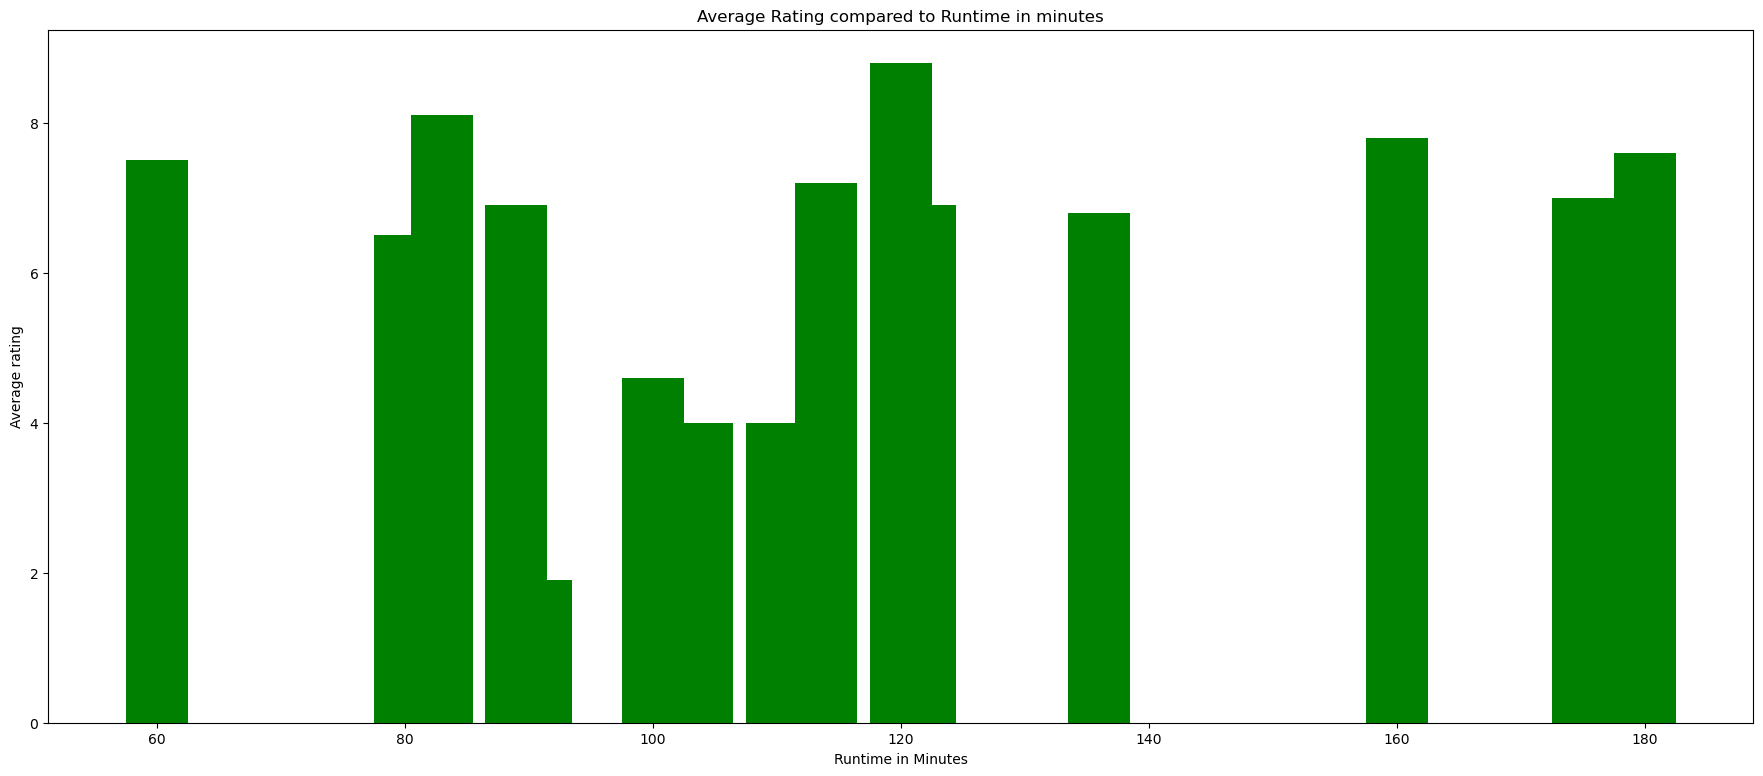

In [1128]:
plt.data = cleaned_data.head(15)
x = cleaned_data.head(15)['runtime_minutes']
y = cleaned_data.head(15)['averagerating']


# plot the graph using the above data
plt.figure(figsize = (22,9))


# creating the bar plot
plt.bar(x, y, color ='green',
        width = 5.0)
 
plt.xlabel("Runtime in Minutes")
plt.ylabel("Average rating")
plt.title("Average Rating compared to Runtime in minutes")
plt.show()

>Movies with a highest runtime like 180 minutes and 175 minutes have the highest average rating. However,  some of categories still have a high average rating even with low runtime.

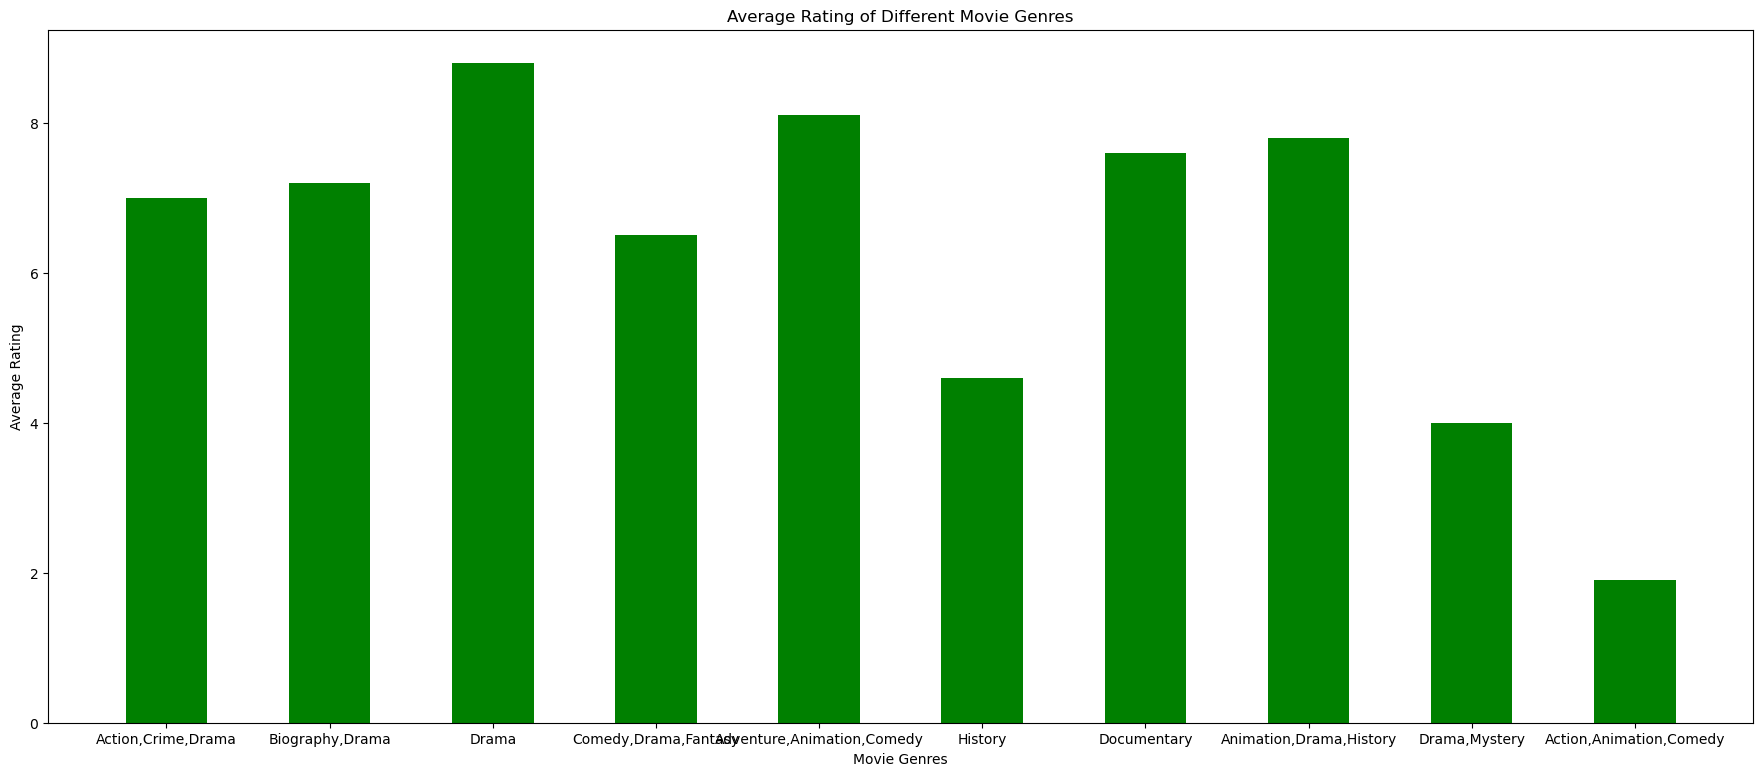

In [1129]:
plt.data = cleaned_data.head(15)
x = cleaned_data.head(15)['genres']
y = cleaned_data.head(15)['averagerating']


#plot the graph using the above data
plt.figure(figsize = (22,9))


# creating the bar plot
plt.bar(x, y, color ='green',
        width = 0.5)
 
plt.xlabel("Movie Genres")
plt.ylabel("Average Rating")
plt.title("Average Rating of Different Movie Genres")
plt.show()

From the above graph, we can tell that action,comedy and animation combo have the lowest ratings closely followed by Drama,Mystery combo while the drama genre has the highest ratings.

    We are going to see how the data in the second set compares to one another using visual representations.

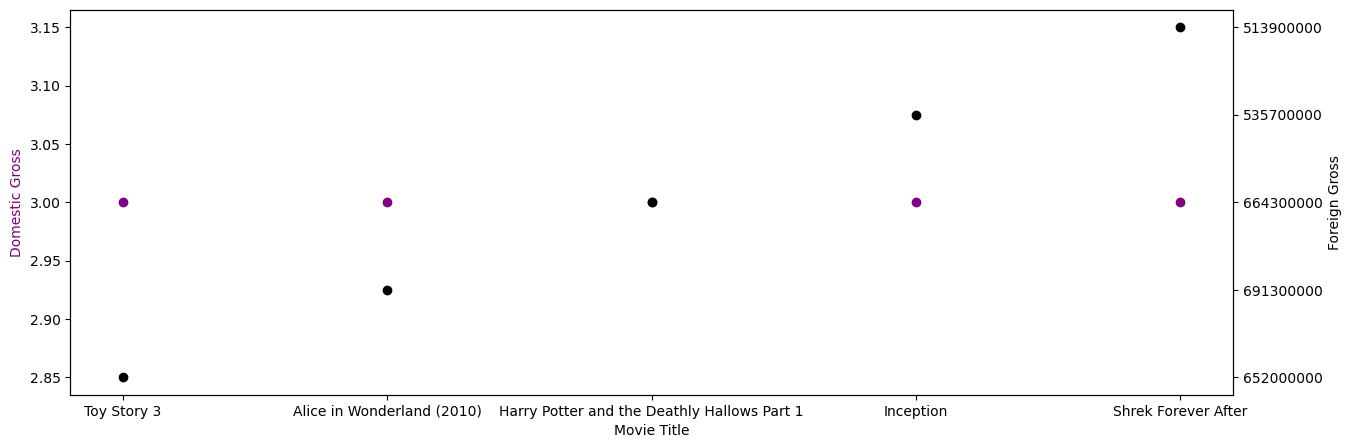

In [1124]:
# y axis, foreign_gross and domestic_gross
plt.data = cd.head()
fig, ax1 = plt.subplots()

# Defining the variables
x = cd.head()['title']
y1 = cd.head()['domestic_gross']
y2 = cd.head()['foreign_gross']


ax2 = ax1.twinx()
ax1.scatter(x, y1, color='purple')
ax2.scatter(x, y2, color='black')

ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Domestic Gross', color='purple')
ax2.set_ylabel('Foreign Gross', color='black')

plt.gcf().set_size_inches((15,5 ))
plt.show()

>Toy Story 3 has the lowest foreign gross income but highest domestic income, while Shrek Forever After has the lowest domestic income but the highest foreign income.Depending on the target ie domestic or foreign, this should be taken into consideration.

Conclusions made from the study.
1. Drama genre happens to have the highest average rating,whilst the animation,action,comedy combo had the lowest average rating. This means that if Microsoft decides to into the movie industry, they should consider going into the drama genre which has the highest ratings. They may also consider doing the Animation,comedy,adventure combo as it also has the second highest ratings.
2. The more the runtime the higher the average rating.
3. The lower the domestic income, the higher the foreign gross and vice versa. This is seen in the Shrek forever after movie and toy story 3